In [130]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.preprocessing import MinMaxScaler

from fastprogress import progress_bar
import missingno as msno

import torch
import torch.nn as nn
from torch.optim import AdamW
from torch.utils.data import TensorDataset, DataLoader

# # Set maximum number of rows to display
# pd.set_option('display.max_rows', 15)
# # Display all columns without truncation
# pd.set_option('display.max_columns', None)

# Data
- Age - 5-years gap
- Height (cm)
- Weight (kg)
- Waist (cm) - Waist circumference length
- Eyesight (left)
- Eyesight (right)
- Hearing (left)
- Hearing (right)
- Systolic - Blood pressure
- Relaxation - Blood pressure
- Fasting blood sugar
- Cholesterol - Total
- Triglyceride
- HDL - Cholesterol type
- LDL - Cholesterol type
- Hemoglobin
- Urine protein
- Serum creatinine
- AST - Glutamic oxaloacetic transaminase type
- ALT - Glutamic oxaloacetic transaminase type
- GTP - γ-GTP
- Dental caries
- Smoking

# 0. Preprocessing

In [131]:
file_path = os.getcwd()
train_file = '/train.csv'
test_file = '/test.csv'

train_file_path = file_path + train_file
test_file_path = file_path + test_file

In [132]:
df = pd.read_csv(train_file_path)
train = pd.read_csv(train_file_path)
test = pd.read_csv(train_file_path)

# 1. Data
## 1.1 Exploration


In [133]:
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [135]:
df.tail()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,55,80,14.4,1,1.1,22,17,37,0,1
159255,159255,40,145,45,76.4,1.0,1.2,1,1,125,...,87,81,14.0,1,0.8,21,16,17,0,0


In [136]:
df.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [137]:
df.shape

(159256, 24)

### 1.1.1 Missing values

<Axes: >

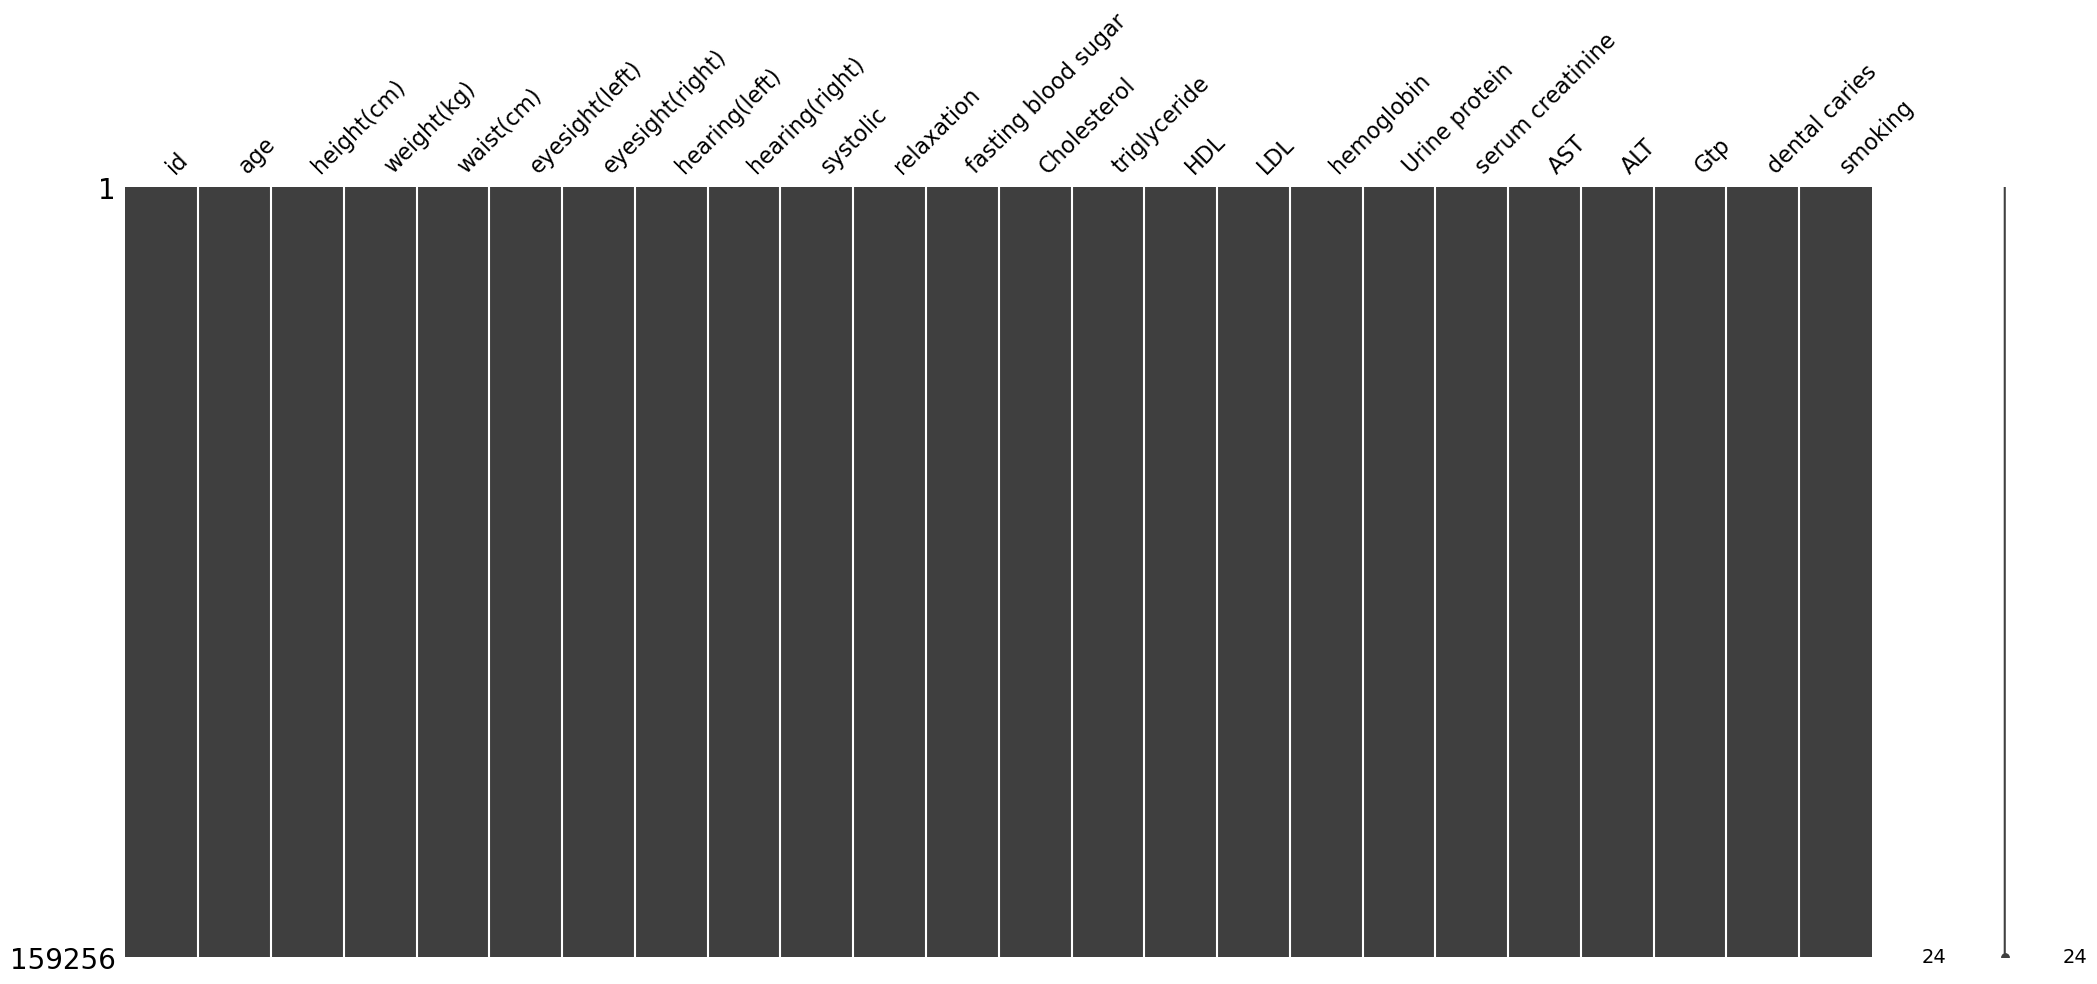

In [138]:
msno.matrix(df)

### 1.1.2 Duplicates

In [139]:
df.duplicated().sum()

0

### 1.1.3 Target

In [140]:
#>> Target
df.smoking.value_counts()

smoking
0    89603
1    69653
Name: count, dtype: int64

### 1.1.4 Age

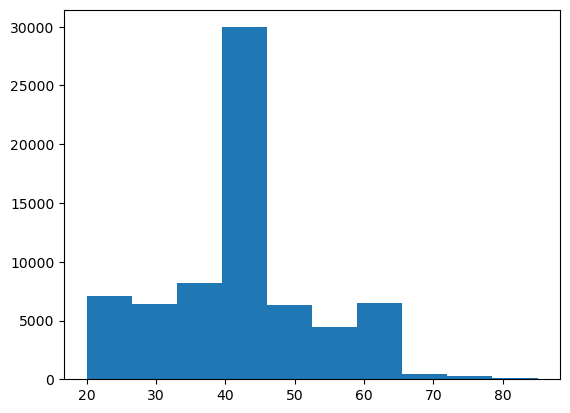

In [141]:
#Ploting Histogram to visualize people smoking based on their age group
plt.hist(df[df['smoking']==1][['age']])
plt.show()

In [142]:
df["age"].min()

20

In [143]:
df["age"].max()

85

## 1.2 Processing


In [144]:
df = df.astype(np.float32)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  float32
 1   age                  159256 non-null  float32
 2   height(cm)           159256 non-null  float32
 3   weight(kg)           159256 non-null  float32
 4   waist(cm)            159256 non-null  float32
 5   eyesight(left)       159256 non-null  float32
 6   eyesight(right)      159256 non-null  float32
 7   hearing(left)        159256 non-null  float32
 8   hearing(right)       159256 non-null  float32
 9   systolic             159256 non-null  float32
 10  relaxation           159256 non-null  float32
 11  fasting blood sugar  159256 non-null  float32
 12  Cholesterol          159256 non-null  float32
 13  triglyceride         159256 non-null  float32
 14  HDL                  159256 non-null  float32
 15  LDL              

## 1.3 Adding features

### 1.3.1 BMI
bmi = weight / height (m) ^2

In [145]:
df["BMI"] = df["weight(kg)"] / ((df["height(cm)"]/100)**2)

In [146]:
df.BMI.min()

11.718749046325684

In [147]:
df.BMI.max()

45.785640716552734

### 1.3.2 Hypertension
Hypertention is defined as consistenyl elevated blood pressure levels, and systolic blood pressure is one of the key measurements used to diagnose and classify hypertension.
- Normal: sys < 120, relax < 80
- Elevated: sys 120 - 129, relax < 80
- Hypertention stage 1: sys 130 - 139, relax 80 - 89
- Hypertention stage 2: sys >= 140, relax > 90

In [148]:
df['systolic'].max()

213.0

In [149]:
def categorize_hypertension(df):
    if df['systolic'] >= 140 or df['relaxation'] >= 90:
        return 1
    else:
        return 0
    
df['hypertension'] = df.apply(categorize_hypertension, axis=1)


In [150]:
df['hypertension'].value_counts()

hypertension
0    141751
1     17505
Name: count, dtype: int64

## 1.4 Categorical variables
- Dental caries: 0, 1
- Urine protein: 1, 2, 3, 4, 5, 6
- Hearing left/right: 1, 2
- Hypertension: normal, elevated, stage 1, stage 2

In [151]:
def preprocess(df):
    df = pd.get_dummies(df, columns = ["hearing(left)","hearing(right)","Urine protein","dental caries", "hypertension"],dtype = 'int8')
    return df

In [152]:
df = preprocess(df)

In [153]:
df

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,...,Urine protein_1.0,Urine protein_2.0,Urine protein_3.0,Urine protein_4.0,Urine protein_5.0,Urine protein_6.0,dental caries_0.0,dental caries_1.0,hypertension_0,hypertension_1
0,0.0,55.0,165.0,60.0,81.000000,0.5,0.6,135.0,87.0,94.0,...,1,0,0,0,0,0,1,0,1,0
1,1.0,70.0,165.0,65.0,89.000000,0.6,0.7,146.0,83.0,147.0,...,1,0,0,0,0,0,0,1,0,1
2,2.0,20.0,170.0,75.0,81.000000,0.4,0.5,118.0,75.0,79.0,...,1,0,0,0,0,0,1,0,1,0
3,3.0,35.0,180.0,95.0,105.000000,1.5,1.2,131.0,88.0,91.0,...,1,0,0,0,0,0,0,1,1,0
4,4.0,30.0,165.0,60.0,80.500000,1.5,1.0,121.0,76.0,91.0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251.0,40.0,155.0,45.0,69.000000,1.5,2.0,127.0,80.0,64.0,...,1,0,0,0,0,0,1,0,1,0
159252,159252.0,50.0,155.0,75.0,82.000000,1.0,1.0,120.0,80.0,89.0,...,1,0,0,0,0,0,1,0,1,0
159253,159253.0,40.0,160.0,50.0,66.000000,1.5,1.0,114.0,70.0,84.0,...,1,0,0,0,0,0,1,0,1,0
159254,159254.0,50.0,165.0,75.0,92.000000,1.2,1.0,121.0,90.0,122.0,...,1,0,0,0,0,0,1,0,0,1


## 1.5 Feature selection

In [154]:
cor = df.corr()["smoking"].abs().sort_values(ascending=False)

cor.head(15)

smoking              1.000000
hemoglobin           0.450679
height(cm)           0.447111
weight(kg)           0.351748
triglyceride         0.331975
Gtp                  0.305561
serum creatinine     0.272979
HDL                  0.271186
waist(cm)            0.262715
age                  0.206033
ALT                  0.163016
BMI                  0.141723
eyesight(right)      0.109781
relaxation           0.109501
dental caries_0.0    0.106636
Name: smoking, dtype: float64

In [155]:
cor.tail(15)

systolic              0.058642
Cholesterol           0.051896
hearing(left)_2.0     0.038219
hearing(left)_1.0     0.038219
hearing(right)_1.0    0.036858
hearing(right)_2.0    0.036858
Urine protein_1.0     0.032247
Urine protein_2.0     0.026999
hypertension_0        0.023920
hypertension_1        0.023920
Urine protein_3.0     0.015999
Urine protein_6.0     0.005412
Urine protein_4.0     0.004314
Urine protein_5.0     0.003739
id                    0.000632
Name: smoking, dtype: float64

In [156]:
#top5 = cor.head(6)

selected_columns = ["smoking","hemoglobin", "height(cm)", "weight(kg)", "triglyceride", "Gtp", "hypertension_0", "hypertension_1"]

subset = df[selected_columns]
subset

,smoking,hemoglobin,height(cm),weight(kg),triglyceride,Gtp,hypertension_0,hypertension_1
0,1.0,16.500000,165.0,60.0,300.0,27.0,1,0
1,0.0,16.200001,165.0,65.0,55.0,37.0,0,1
2,1.0,17.400000,170.0,75.0,197.0,53.0,1,0
3,0.0,15.900000,180.0,95.0,203.0,30.0,1,0
4,1.0,15.400000,165.0,60.0,87.0,17.0,1,0
...,...,...,...,...,...,...,...,...
159251,0.0,14.500000,155.0,45.0,47.0,13.0,1,0
159252,0.0,14.500000,155.0,75.0,202.0,18.0,1,0
159253,0.0,10.900000,160.0,50.0,45.0,12.0,1,0
159254,1.0,14.400000,165.0,75.0,148.0,37.0,0,1


In [157]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   smoking         159256 non-null  float32
 1   hemoglobin      159256 non-null  float32
 2   height(cm)      159256 non-null  float32
 3   weight(kg)      159256 non-null  float32
 4   triglyceride    159256 non-null  float32
 5   Gtp             159256 non-null  float32
 6   hypertension_0  159256 non-null  int8   
 7   hypertension_1  159256 non-null  int8   
dtypes: float32(6), int8(2)
memory usage: 3.9 MB


/Users/michellehu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michellehu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michellehu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


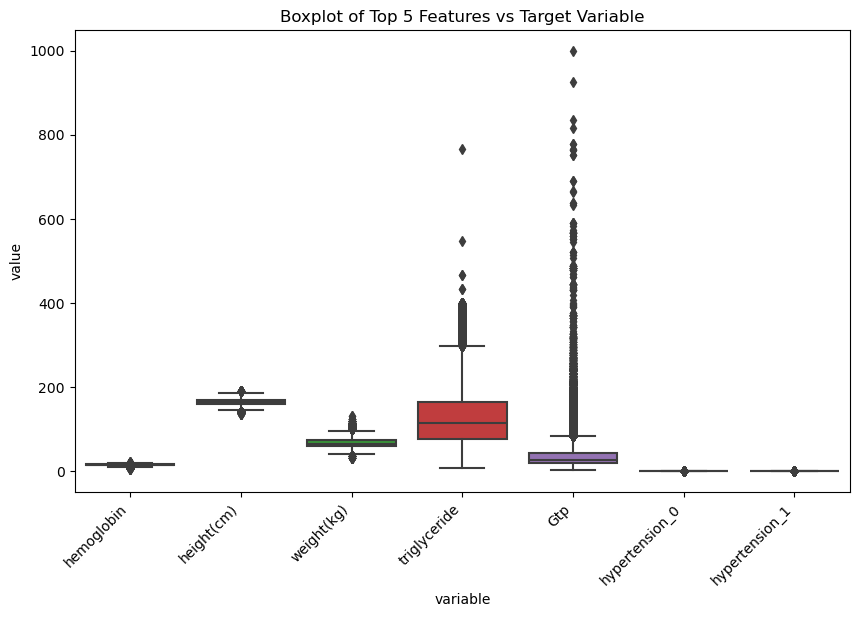

In [158]:
# Melt the DataFrame to long format for boxplot
subset_melted = pd.melt(subset, id_vars='smoking')

# Visualize the relationship with boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=subset_melted, x='variable', y='value')
plt.title('Boxplot of Top 5 Features vs Target Variable')
plt.xticks(rotation=45, ha='right')
plt.show()

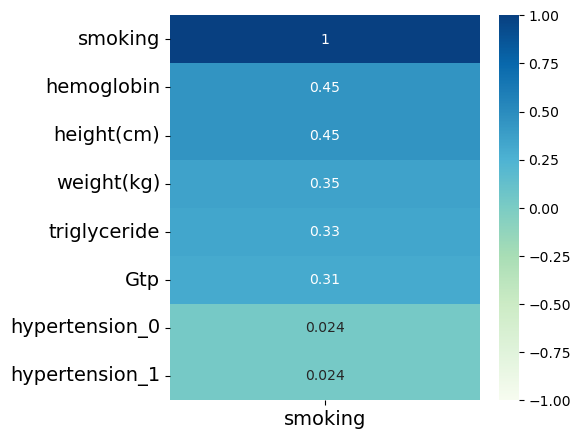

In [159]:
fig, ax = plt.subplots(figsize=(5,5))

sns.heatmap(subset.corr()[['smoking']].abs().sort_values('smoking'),
            vmax=1, vmin=-1, annot=True, ax=ax, cmap="GnBu");

ax.invert_yaxis()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

## 1.4 Outliers - PCA

In [160]:
subset

,smoking,hemoglobin,height(cm),weight(kg),triglyceride,Gtp,hypertension_0,hypertension_1
0,1.0,16.500000,165.0,60.0,300.0,27.0,1,0
1,0.0,16.200001,165.0,65.0,55.0,37.0,0,1
2,1.0,17.400000,170.0,75.0,197.0,53.0,1,0
3,0.0,15.900000,180.0,95.0,203.0,30.0,1,0
4,1.0,15.400000,165.0,60.0,87.0,17.0,1,0
...,...,...,...,...,...,...,...,...
159251,0.0,14.500000,155.0,45.0,47.0,13.0,1,0
159252,0.0,14.500000,155.0,75.0,202.0,18.0,1,0
159253,0.0,10.900000,160.0,50.0,45.0,12.0,1,0
159254,1.0,14.400000,165.0,75.0,148.0,37.0,0,1


In [161]:
df_pca = subset.copy()

# pca only for numerical data
df_pca = df_pca.drop(["hypertension_0", "hypertension_1"], axis = 1)
df_pca.head()

,smoking,hemoglobin,height(cm),weight(kg),triglyceride,Gtp
0,1.0,16.500000,165.0,60.0,300.0,27.0
1,0.0,16.200001,165.0,65.0,55.0,37.0
2,1.0,17.400000,170.0,75.0,197.0,53.0
3,0.0,15.900000,180.0,95.0,203.0,30.0
4,1.0,15.400000,165.0,60.0,87.0,17.0


In [162]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [163]:

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Select number of components
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Project data onto selected components
X_projected = X_pca[:, :n_components]

# Calculate reconstruction error
X_reconstructed = np.dot(X_projected, pca.components_[:n_components]) + pca.mean_
reconstruction_error = np.sqrt(np.mean((X_scaled - X_reconstructed)**2, axis=1))

# Identify outliers
outlier_threshold = np.percentile(reconstruction_error, 95)
outliers = df_pca[reconstruction_error > outlier_threshold]

In [164]:
outliers

,smoking,hemoglobin,height(cm),weight(kg),triglyceride,Gtp
5,1.0,15.900000,170.0,55.0,343.0,119.0
35,0.0,13.100000,145.0,65.0,88.0,17.0
94,1.0,17.100000,170.0,110.0,194.0,28.0
95,1.0,17.100000,160.0,75.0,193.0,23.0
129,0.0,12.700000,155.0,75.0,60.0,24.0
...,...,...,...,...,...,...
159199,1.0,17.299999,160.0,75.0,121.0,33.0
159203,0.0,12.200000,140.0,55.0,76.0,12.0
159219,0.0,14.200000,150.0,70.0,102.0,16.0
159230,1.0,18.600000,175.0,100.0,180.0,96.0


/Users/michellehu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michellehu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michellehu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


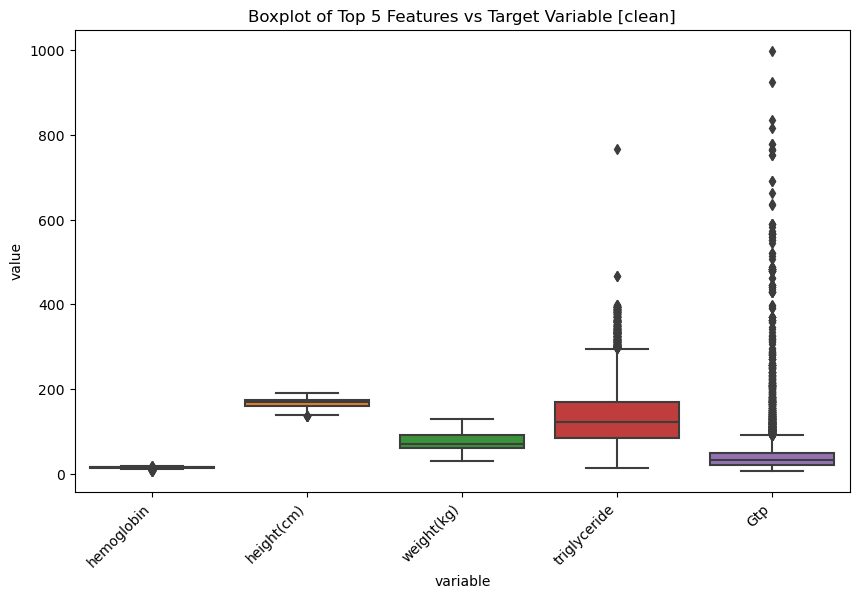

In [165]:
# Melt the DataFrame to long format for boxplot
clean_melt = pd.melt(outliers, id_vars='smoking')

# Visualize the relationship with boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_melt, x='variable', y='value')
plt.title('Boxplot of Top 5 Features vs Target Variable [clean]')
plt.xticks(rotation=45, ha='right')
plt.show()

In [166]:
cleaned_data = df_pca.drop(outliers.index)

In [167]:
cleaned_data

,smoking,hemoglobin,height(cm),weight(kg),triglyceride,Gtp
0,1.0,16.500000,165.0,60.0,300.0,27.0
1,0.0,16.200001,165.0,65.0,55.0,37.0
2,1.0,17.400000,170.0,75.0,197.0,53.0
3,0.0,15.900000,180.0,95.0,203.0,30.0
4,1.0,15.400000,165.0,60.0,87.0,17.0
...,...,...,...,...,...,...
159251,0.0,14.500000,155.0,45.0,47.0,13.0
159252,0.0,14.500000,155.0,75.0,202.0,18.0
159253,0.0,10.900000,160.0,50.0,45.0,12.0
159254,1.0,14.400000,165.0,75.0,148.0,37.0


/Users/michellehu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michellehu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michellehu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


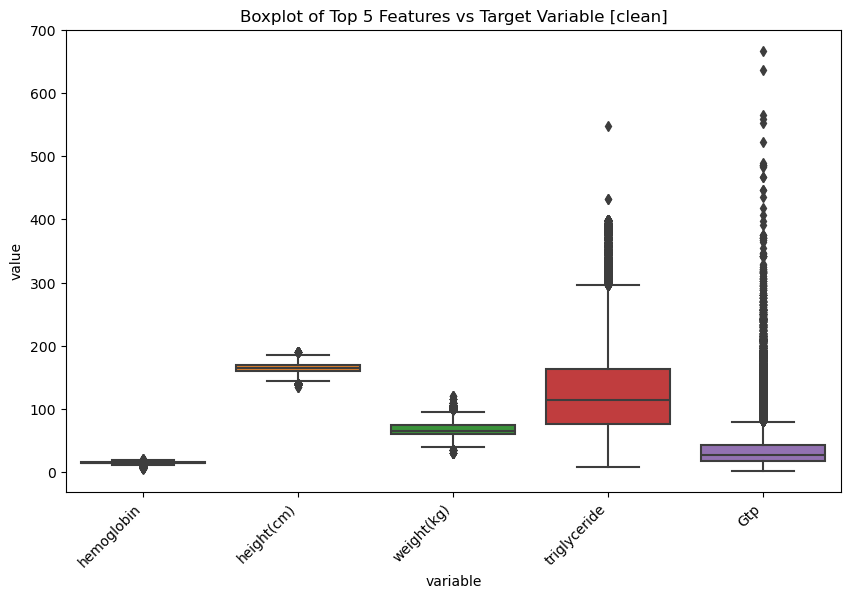

In [168]:
# Melt the DataFrame to long format for boxplot
clean_melt = pd.melt(cleaned_data, id_vars='smoking')

# Visualize the relationship with boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_melt, x='variable', y='value')
plt.title('Boxplot of Top 5 Features vs Target Variable [clean]')
plt.xticks(rotation=45, ha='right')
plt.show()

In [169]:
hyp = subset[["hypertension_0", "hypertension_0"]]
hyp.head

<bound method NDFrame.head of         hypertension_0  hypertension_0
0                    1               1
1                    0               0
2                    1               1
3                    1               1
4                    1               1
...                ...             ...
159251               1               1
159252               1               1
159253               1               1
159254               0               0
159255               1               1

[159256 rows x 2 columns]>

In [170]:
cleaned_data.head()

,smoking,hemoglobin,height(cm),weight(kg),triglyceride,Gtp
0,1.0,16.500000,165.0,60.0,300.0,27.0
1,0.0,16.200001,165.0,65.0,55.0,37.0
2,1.0,17.400000,170.0,75.0,197.0,53.0
3,0.0,15.900000,180.0,95.0,203.0,30.0
4,1.0,15.400000,165.0,60.0,87.0,17.0


In [171]:
merged_df = pd.merge(cleaned_data, hyp, left_index=True, right_index=True)
merged_df

,smoking,hemoglobin,height(cm),weight(kg),triglyceride,Gtp,hypertension_0,hypertension_0
0,1.0,16.500000,165.0,60.0,300.0,27.0,1,1
1,0.0,16.200001,165.0,65.0,55.0,37.0,0,0
2,1.0,17.400000,170.0,75.0,197.0,53.0,1,1
3,0.0,15.900000,180.0,95.0,203.0,30.0,1,1
4,1.0,15.400000,165.0,60.0,87.0,17.0,1,1
...,...,...,...,...,...,...,...,...
159251,0.0,14.500000,155.0,45.0,47.0,13.0,1,1
159252,0.0,14.500000,155.0,75.0,202.0,18.0,1,1
159253,0.0,10.900000,160.0,50.0,45.0,12.0,1,1
159254,1.0,14.400000,165.0,75.0,148.0,37.0,0,0


In [172]:
df_train = merged_df

<Axes: >

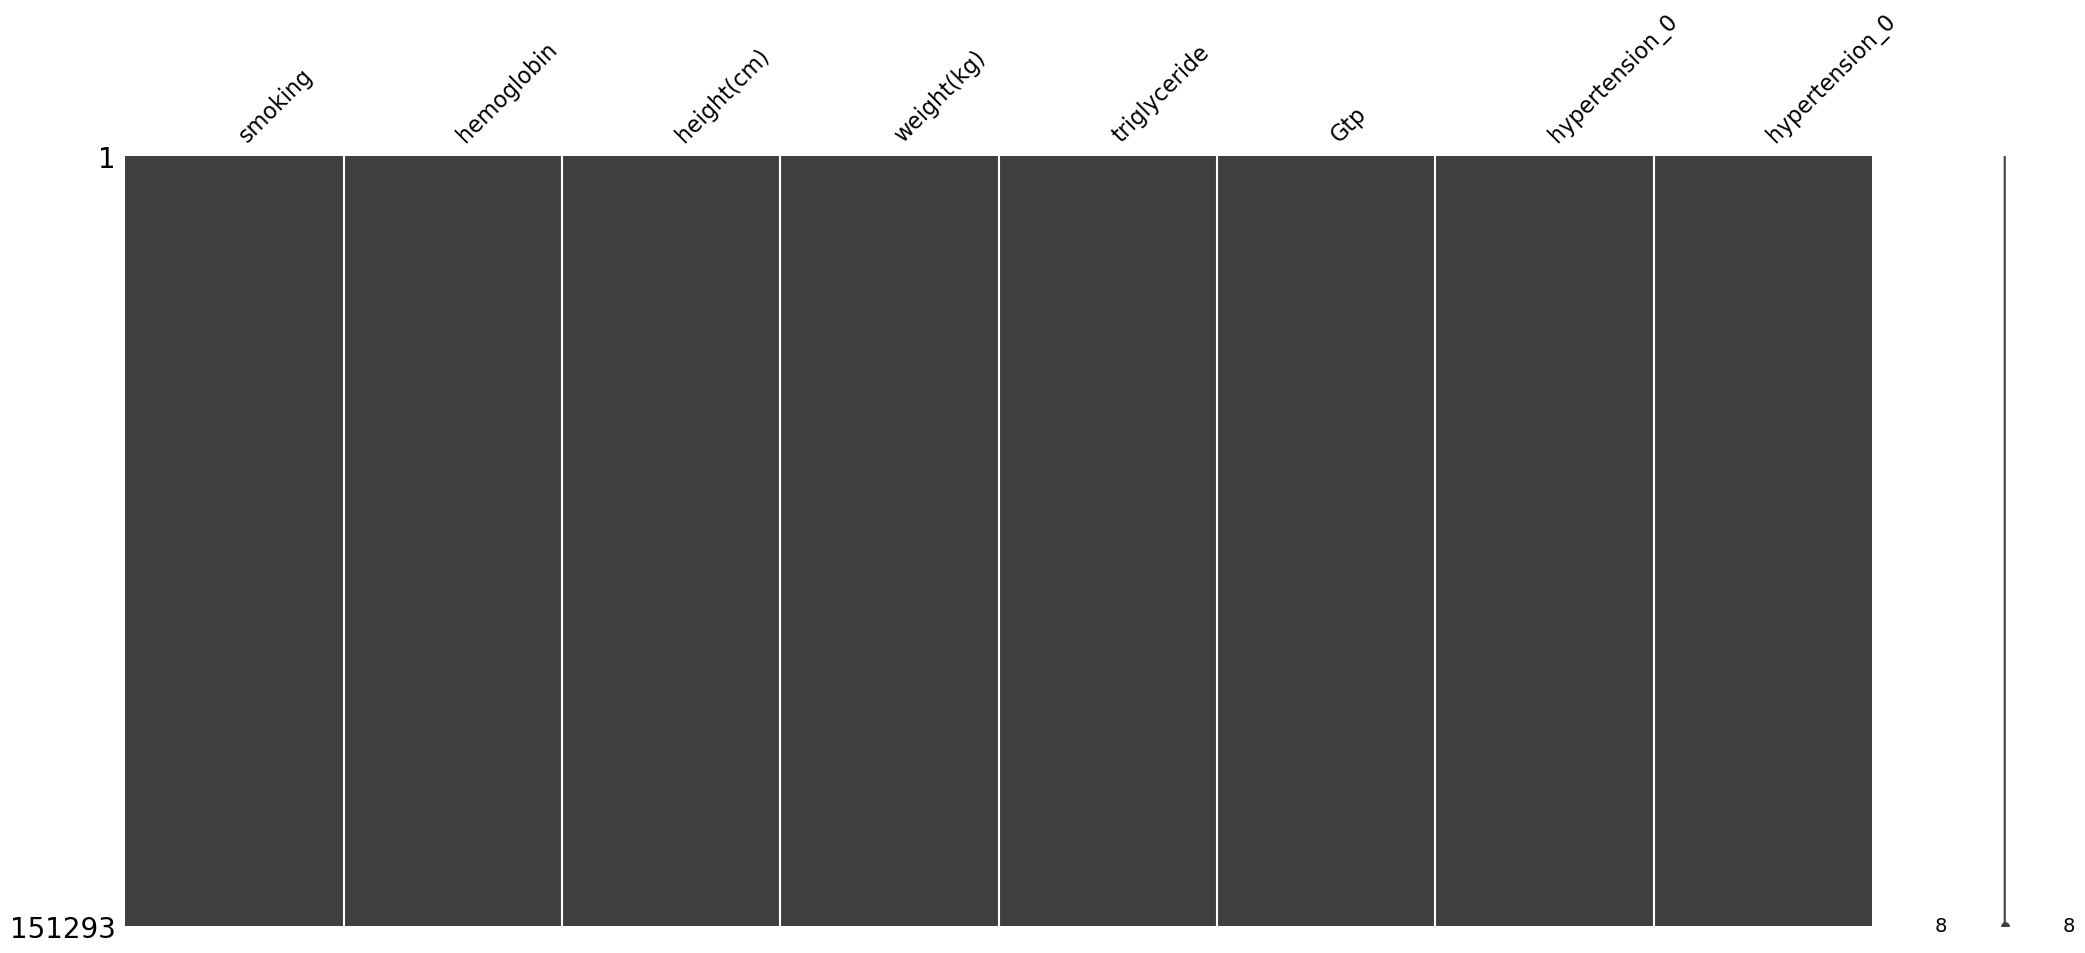

In [173]:
msno.matrix(df_train)

In [174]:
df_train = df_train.astype(np.float32)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151293 entries, 0 to 159255
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   smoking         151293 non-null  float32
 1   hemoglobin      151293 non-null  float32
 2   height(cm)      151293 non-null  float32
 3   weight(kg)      151293 non-null  float32
 4   triglyceride    151293 non-null  float32
 5   Gtp             151293 non-null  float32
 6   hypertension_0  151293 non-null  float32
 7   hypertension_0  151293 non-null  float32
dtypes: float32(8)
memory usage: 5.8 MB


# 2. Train/validation split

In [175]:
array_X = df_train.drop(columns='smoking').to_numpy()
array_y = df_train["smoking"].to_numpy()
array_y = np.reshape(array_y, (-1, 1))

train_X, valid_X, train_y, valid_y = train_test_split(array_X, array_y, test_size=0.2)

## 2.1 Scaling


In [176]:
# Step 1: Instantiate the Scaler (using MinMaxScaler with range (0, 1))
scaler_X = MinMaxScaler(feature_range=(0, 1))

# Step 2: Fit and Transform Training Data
train_X = scaler_X.fit_transform(train_X)

# Step 3: Transform Validation Data
valid_X = scaler_X.transform(valid_X)

In [177]:
# tx = pd.DataFrame(train_X)
# ty = pd.DataFrame(train_y)
# vx = pd.DataFrame(valid_X)
# vy = pd.DataFrame(valid_y)

In [178]:
# csv_file_path1 = "trainX.csv"
# csv_file_path2 = "trainy.csv"
# csv_file_path3 = "validX.csv"
# csv_file_path4 = "validy.csv"

# tx.to_csv(csv_file_path1, index=False)
# ty.to_csv(csv_file_path2, index=False)
# vx.to_csv(csv_file_path3, index=False)
# vy.to_csv(csv_file_path4, index=False)


## 2.2 Tensors


In [179]:
tX = torch.tensor(train_X)
tX  

tensor([[0.3851, 0.4545, 0.1667,  ..., 0.0211, 1.0000, 1.0000],
        [0.6832, 0.5455, 0.3889,  ..., 0.0286, 0.0000, 0.0000],
        [0.6832, 0.6364, 0.5000,  ..., 0.0857, 1.0000, 1.0000],
        ...,
        [0.6770, 0.7273, 0.4444,  ..., 0.0286, 1.0000, 1.0000],
        [0.7019, 0.9091, 0.9444,  ..., 0.0632, 1.0000, 1.0000],
        [0.6832, 0.9091, 0.7222,  ..., 0.0602, 1.0000, 1.0000]])

In [180]:
tX.sum(axis=1)

tensor([3.1146, 1.9009, 4.1883,  ..., 3.9764, 5.0502, 4.6554])

In [181]:
train_ds = TensorDataset(torch.tensor(train_X), torch.tensor(train_y))
valid_ds = TensorDataset(torch.tensor(valid_X), torch.tensor(valid_y))

## 2.3 Data loader

In [182]:
train_dl = DataLoader(train_ds, batch_size=32)
valid_dl = DataLoader(valid_ds, batch_size=len(valid_ds))

# 3. Model


In [183]:
train_y

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [184]:
train_X.shape

(121034, 7)

In [185]:
class Smoke(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Smoke, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = torch.sigmoid(self.output(x))  # Apply sigmoid to final output
        return x


# 4. Trainer


In [186]:
class Trainer:
    def __init__(self, model, lossfunction, train_dl, valid_dl, lr, wd, optimizer=AdamW, metric=None, device=None):
        self.device = device           # Onthoudt het device
        self.model = model.to(device)  # Zet het model op de GPU (of op een ander device)
        self.train_dl = train_dl
        self.valid_dl = valid_dl
        self.lossfunction = lossfunction
        self.optimizer = optimizer(model.parameters(), lr = lr, weight_decay = wd) # learning rate en weight decay meegeven
        self.metric = metric  
        
        self.epochid = 0
        
    def train_once(self):
        """
            Enkele epoch trainen
        """
        epochloss = 0
        epochn = 0
        torch.set_grad_enabled(True)            # Vereist voor het trainen om zo de gradients te berekenen
        
        for X, y in self.train_dl:
            X, y = X.to(self.device), y.to(self.device)  # Zet de data over op het device
            self.optimizer.zero_grad()          # De gradients worden op nul gezet
            y_pred = self.model(X)              # Een forward pass wordt uitgevoerd
            l = self.lossfunction(y_pred, y)    # Bereken de loss
            l.backward()                        # Bereken en verzamel de gradients
            self.optimizer.step()               # Update de parameters met behulp van de verzamelde gradiënten en de learning rate 
            
            try:
                self.scheduler.step()
            except: 
                pass
            
            epochloss += l.item() * len(X)      # Bereken de totale loss
            epochn += len(X)                    # Bereken het aantal getrainde items in de epoch  

            try:
                y_pred = self.model.post_forward(y_pred)
            except:
                pass         
        
            try:
                all_y = np.concatenate([all_y, y.cpu()])  # Voeg de y's toe aan de huidige batch
            except:
                all_y = y.cpu()                           # Als er nog geen all_y is, gebruik dan de eerste y
            try:
                all_pred_y = np.concatenate([all_pred_y, y_pred.detach().cpu().numpy()]) 
            except:
                all_pred_y = y_pred.detach().cpu().numpy()   
        m = self.metric(all_y, all_pred_y) #squared = false weergeeft de RMSE 
        return [epochloss / epochn, m]               # Return het gewogen gemiddelde over de training

    def validate_once(self):
        """
            Het valideren op de validatie set 
        """
        epochloss = 0
        epochn = 0
        with torch.set_grad_enabled(False):
            for X, y in self.valid_dl:
                X, y = X.to(self.device), y.to(self.device)  
                y_pred = model(X)                
                l = self.lossfunction(y_pred, y)  
                epochloss += l.item() * len(X)    
                epochn += len(X)                  
                
                try:
                    y_pred = self.model.post_forward(y_pred)
                except:
                    pass 
                
                try:
                    all_y = np.concatenate([all_y, y.cpu()])   
                except:
                    all_y = y.cpu()                           
                try:
                    all_pred_y = np.concatenate([all_pred_y, y_pred.cpu()]) 
                except:
                    all_pred_y = y_pred.cpu()    
        m = self.metric(all_y, all_pred_y)     
        return [epochloss / epochn, m];                 
    
    def train(self, epochs, report_frequency=1):
        """
            Daadwerkelijk trainen en de getrainde waarde per epoch printen
        """
        self.train_losses = []
        self.valid_losses = []
        self.train_m = []
        self.valid_m = []
      
        for e in progress_bar(range(epochs)):
            self.epochid +=1
            train_loss, train_m = self.train_once()
            valid_loss, valid_m = self.validate_once()
            self.train_losses.append(train_loss)
            self.valid_losses.append(valid_loss)
            self.train_m.append(train_m)
            self.valid_m.append(valid_m)

            if (((e+1)%report_frequency) ==0) or e == (epochs-1):
                print(f'{self.epochid} train loss: {train_loss:.4f} valid loss: {valid_loss:.4f} {self.metric.__name__} {valid_m:.4f}')

    def learning_curve(self):
        """
            Het visualiseren van de learning curve
        """
        plt.figure()
        plt.plot(range(len(t.train_losses)), t.train_losses, label='train', color='#0077b3')
        plt.plot(range(len(t.valid_losses)), t.valid_losses, label='valid', color='#cc4100')
        plt.legend()
        plt.ylabel('loss_bce')
        plt.xlabel('epochs');
        
    def validation_curve(self):
        """
            Het visualiseren van de validatie curve
        """
        plt.figure()
        plt.plot(range(len(t.train_m)), t.train_m, label='train', color='#0077b3')
        plt.plot(range(len(t.valid_m)), t.valid_m, label='valid', color='#cc4100')
        plt.legend()
        plt.ylabel(self.metric.__name__)      
        plt.xlabel('epoch');     
    
    def plot_curves(self):
        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
        ax1.plot(range(len(t.train_losses)), t.train_losses, label='train', color='#0077b3')
        ax1.plot(range(len(t.valid_losses)), t.valid_losses, label='valid', color='#cc4100')
        ax1.legend()
        ax1.set_ylabel('loss_bce')
        ax1.set_xlabel('epochs')
        ax1.set_title('Learning curve');
        
        ax2.plot(range(len(t.train_m)), t.train_m, label='train', color='#0077b3')
        ax2.plot(range(len(t.valid_m)), t.valid_m, label='valid', color='#cc4100')
        ax2.legend()
        ax2.set_ylabel(self.metric.__name__)      
        ax2.set_xlabel('epoch')
        ax2.set_title('Validation curve');

# 5. Train and validate


In [187]:
model = Smoke(input_size = 7, hidden_size = 15, output_size=1)

In [188]:
t = Trainer(model, nn.BCELoss(), train_dl, valid_dl, lr=1e-3, wd=0.0001, metric=roc_auc_score)

In [189]:
%%time
t.train(epochs=250, report_frequency=10)

10 train loss: 0.4701 valid loss: 0.4678 roc_auc_score 0.8477
20 train loss: 0.4687 valid loss: 0.4670 roc_auc_score 0.8486
30 train loss: 0.4682 valid loss: 0.4667 roc_auc_score 0.8488
40 train loss: 0.4678 valid loss: 0.4664 roc_auc_score 0.8491
50 train loss: 0.4676 valid loss: 0.4661 roc_auc_score 0.8494
60 train loss: 0.4676 valid loss: 0.4661 roc_auc_score 0.8492
70 train loss: 0.4674 valid loss: 0.4661 roc_auc_score 0.8492
80 train loss: 0.4672 valid loss: 0.4659 roc_auc_score 0.8494
90 train loss: 0.4671 valid loss: 0.4656 roc_auc_score 0.8498
100 train loss: 0.4669 valid loss: 0.4654 roc_auc_score 0.8499
110 train loss: 0.4668 valid loss: 0.4654 roc_auc_score 0.8499
120 train loss: 0.4668 valid loss: 0.4653 roc_auc_score 0.8499
130 train loss: 0.4667 valid loss: 0.4653 roc_auc_score 0.8499
140 train loss: 0.4666 valid loss: 0.4653 roc_auc_score 0.8499
150 train loss: 0.4666 valid loss: 0.4652 roc_auc_score 0.8499
160 train loss: 0.4666 valid loss: 0.4652 roc_auc_score 0.8499
1

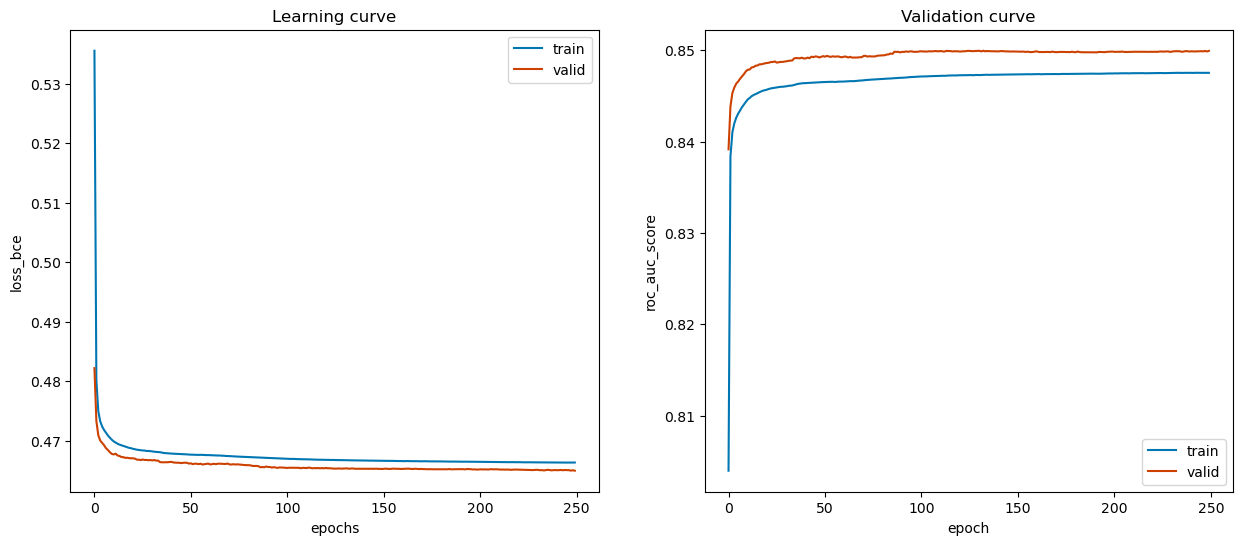

In [190]:
t.plot_curves()

# 6. Predict

In [191]:
model.eval()

Smoke(
  (hidden): Linear(in_features=7, out_features=15, bias=True)
  (relu): ReLU()
  (output): Linear(in_features=15, out_features=1, bias=True)
)

In [196]:
input_data = torch.tensor(train_X, dtype=torch.float32)

In [197]:
with torch.no_grad():
    output = model(input_data)

In [ ]:
# sigmoid (x) < 0.5 --> class 0
# sigmoid (x) >= 0.5 --> class 1

In [198]:
predictions = (output).float()
predictions

tensor([[0.0133],
        [0.5028],
        [0.7650],
        ...,
        [0.4513],
        [0.6540],
        [0.7072]])

In [201]:
len(predictions)

121034

In [202]:
predictions = pd.DataFrame((output.sigmoid() >= 0.5).float().numpy(), columns=['Predicted_Class'])


In [205]:
predictions.head

<bound method NDFrame.head of         Predicted_Class
0                   1.0
1                   1.0
2                   1.0
3                   1.0
4                   1.0
...                 ...
121029              1.0
121030              1.0
121031              1.0
121032              1.0
121033              1.0

[121034 rows x 1 columns]>